<a href="https://colab.research.google.com/github/josephsdavid/Colab_Notebooks/blob/master/DyingRelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#!pip install tensorflow --upgrade
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
print(tf.__version__)

2.1.0


In [0]:
def narrow_relu_net(n_layers):
  input = Input(shape=(1,))
  x = input
  for i in range(n_layers):
    x = Dense(2, activation='relu')(x)
  output = Dense(1, activation='sigmoid')(x)
  return Model(input, output)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_84 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_85 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_86 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 6   

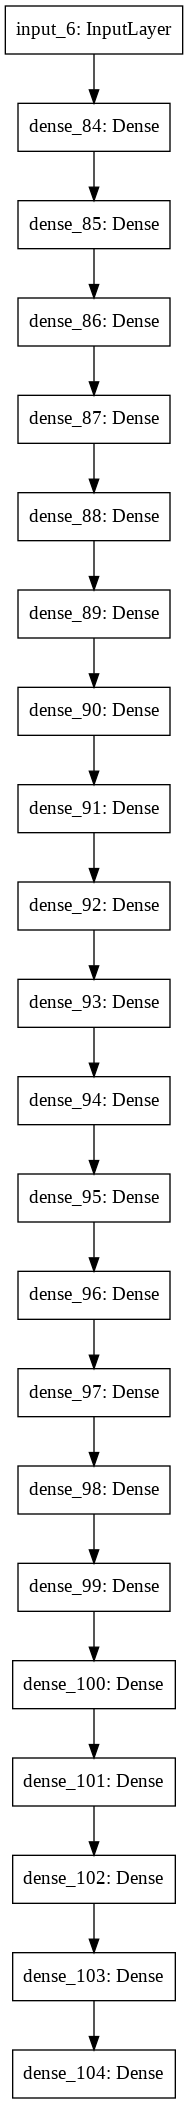

In [38]:

# try any configuration you want! It doesnt matter!!
net = narrow_relu_net(20)
net.compile('adam', 'mse')
print(net.summary())
tf.keras.utils.plot_model(net)


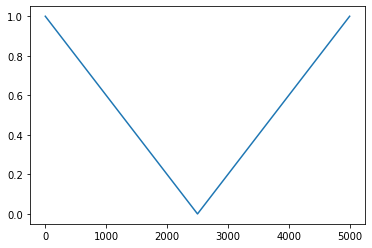

In [39]:
x = np.linspace(start=-1, stop=1, num=5000)
y=np.abs(x)
plt.plot(y)
plt.show()

In [40]:
# do anything you want here!
net.fit(x,y, epochs=100, batch_size=100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 197us/sample - loss: 0.0834
Epoch 2/100
5000/5000 [==============================] - 0s 44us/sample - loss: 0.0834
Epoch 3/100
5000/5000 [==============================] - 0s 45us/sample - loss: 0.0834
Epoch 4/100
5000/5000 [==============================] - 0s 44us/sample - loss: 0.0834
Epoch 5/100
5000/5000 [==============================] - 0s 44us/sample - loss: 0.0834
Epoch 6/100
5000/5000 [==============================] - 0s 42us/sample - loss: 0.0834
Epoch 7/100
5000/5000 [==============================] - 0s 43us/sample - loss: 0.0834
Epoch 8/100
5000/5000 [==============================] - 0s 41us/sample - loss: 0.0834
Epoch 9/100
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0834
Epoch 10/100
5000/5000 [==============================] - 0s 41us/sample - loss: 0.0834
Epoch 11/100
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0834
Epoch 12/100
5000/

# Dying Relu


For a fixed width, the deeper your net gets, the more likely it is for your nodes to act on the negative half of the relu activation function! This means that the relu nodes are not firing, or not doing anythhing. To learn better, as our networks get deeper, we must make them wider. Try however much you like, it is impossible for a deep relu network to learn the absolute value function! I am still learning about this, but this is really interesting. For actual understanding, please refer to [the paper](https://arxiv.org/abs/1903.06733)

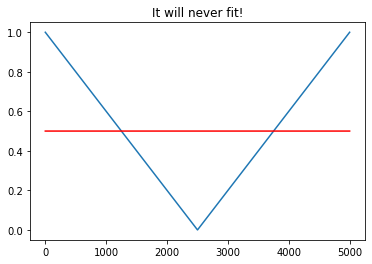

In [36]:
preds = net.predict(x)

plt.plot(y)
plt.plot(preds, 'r')
plt.title("It will never fit!")
plt.show()